In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Sunspot Data
# Replace 'sunspot.csv' with the actual path to your sunspot data file
df = pd.read_csv('sunspot_data.csv')


In [3]:
# Explore Data Structure
print("First 5 rows:")
print(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())




First 5 rows:
   Year  Month  Day  Date In Fraction Of Year  Number of Sunspots  \
0  1818      1    1                  1818.001                  -1   
1  1818      1    2                  1818.004                  -1   
2  1818      1    3                  1818.007                  -1   
3  1818      1    4                  1818.010                  -1   
4  1818      1    5                  1818.012                  -1   

   Standard Deviation  Observations  Indicator  
0                -1.0             0          1  
1                -1.0             0          1  
2                -1.0             0          1  
3                -1.0             0          1  
4                -1.0             0          1  

Data Types:
Year                          int64
Month                         int64
Day                           int64
Date In Fraction Of Year    float64
Number of Sunspots            int64
Standard Deviation          float64
Observations                  int64
Indicator   

In [4]:
# Find the index of the last occurrence of -1 in the 'Number of Sunspots' column
last_negative_one_index = df[df['Number of Sunspots'] == -1].index[-1]

# Keep rows after the last occurrence of -1 (inclusive)
df = df.iloc[last_negative_one_index + 1:]

Missing Values:
 Year                        0
Month                       0
Day                         0
Date In Fraction Of Year    0
Number of Sunspots          0
Standard Deviation          0
Observations                0
Indicator                   0
dtype: int64

Average Number of Sunspots Per Year:
 Year
1848    299.333333
1849    182.517808
1850    126.254795
1851    121.969863
1852    102.732240
           ...    
2015     69.816438
2016     39.822404
2017     21.739726
2018      6.972603
2019      4.157895
Name: Number of Sunspots, Length: 172, dtype: float64


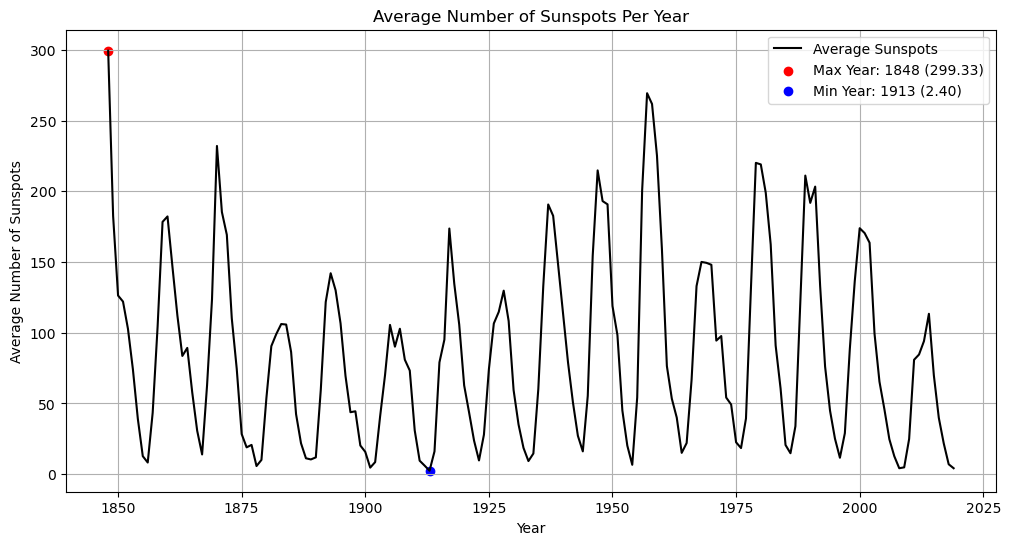

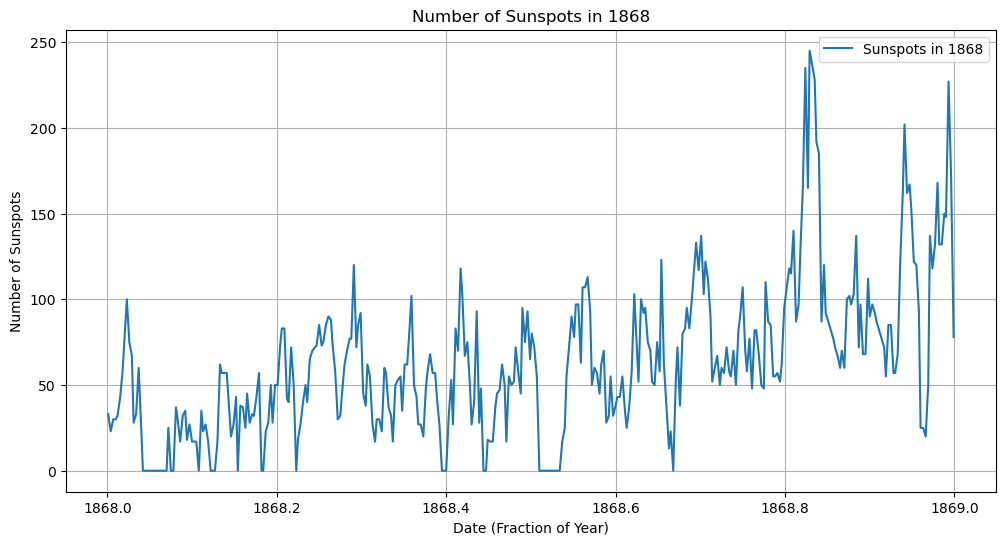

In [6]:
# Analyze Data

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Analyze trends over time
# Group by year and calculate the average number of sunspots per year
yearly_sunspots = df.groupby('Year')['Number of Sunspots'].mean()
print("\nAverage Number of Sunspots Per Year:\n", yearly_sunspots)

# Visualize the trend of sunspots over time
# Highlight the year with the maximum average number of sunspots
max_year = yearly_sunspots.idxmax()
max_value = yearly_sunspots.max()

min_year=yearly_sunspots.idxmin()
min_value=yearly_sunspots.min()

plt.figure(figsize=(12, 6))
plt.plot(yearly_sunspots.index, yearly_sunspots.values,color='black', label='Average Sunspots')
plt.scatter(max_year, max_value, color='red', label=f'Max Year: {max_year} ({max_value:.2f})')
plt.scatter(min_year, min_value, color='blue', label=f'Min Year: {min_year} ({min_value:.2f})')
plt.title('Average Number of Sunspots Per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Sunspots')
plt.legend()
plt.grid()
plt.show()

# Plot the number of sunspots for a random year
random_year = np.random.choice(df['Year'].unique())
sunspots_random_year = df[df['Year'] == random_year]

plt.figure(figsize=(12, 6))
plt.plot(sunspots_random_year['Date In Fraction Of Year'], sunspots_random_year['Number of Sunspots'], label=f'Sunspots in {random_year}')
plt.title(f'Number of Sunspots in {random_year}')
plt.xlabel('Date (Fraction of Year)')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.grid()
plt.show()

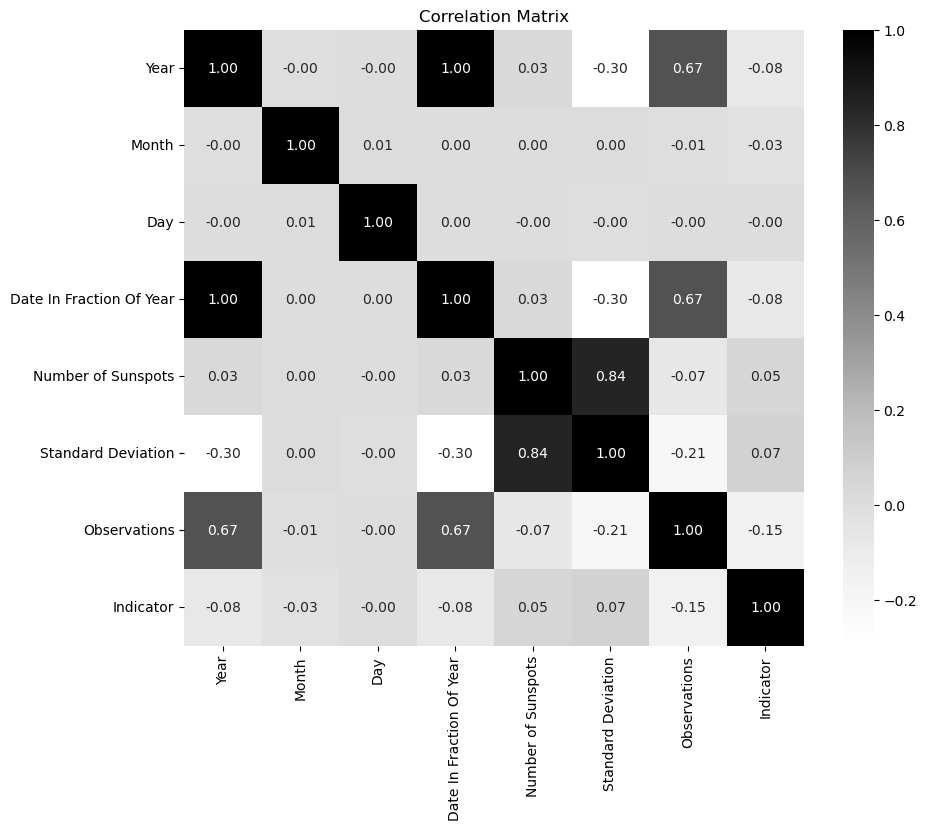

In [19]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Greys", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Analyze correlations to find relevant features for predicting sunspots
correlation_with_sunspots = correlation_matrix['Number of Sunspots'].sort_values(ascending=False)
print("Correlation with 'Number of Sunspots':\n", correlation_with_sunspots)

# Select features with high correlation (absolute value > 0.5 as an example threshold)
relevant_features = correlation_with_sunspots[correlation_with_sunspots.abs() > 0.03].index.tolist()
relevant_features.remove('Number of Sunspots')  # Exclude the target variable itself
print("\nRelevant Features for Prediction:\n", relevant_features)

# Prepare data for ML model

# Split data into features (X) and target (y)
X = df[relevant_features]
y = df['Number of Sunspots']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error on Test Set:", mse)

Correlation with 'Number of Sunspots':
 Number of Sunspots          1.000000
Standard Deviation          0.839265
Indicator                   0.047931
Date In Fraction Of Year    0.033093
Year                        0.033074
Month                       0.003231
Day                        -0.001188
Observations               -0.071206
Name: Number of Sunspots, dtype: float64

Relevant Features for Prediction:
 ['Standard Deviation', 'Indicator', 'Date In Fraction Of Year', 'Year', 'Observations']

Mean Squared Error on Test Set: 169.76163655957052


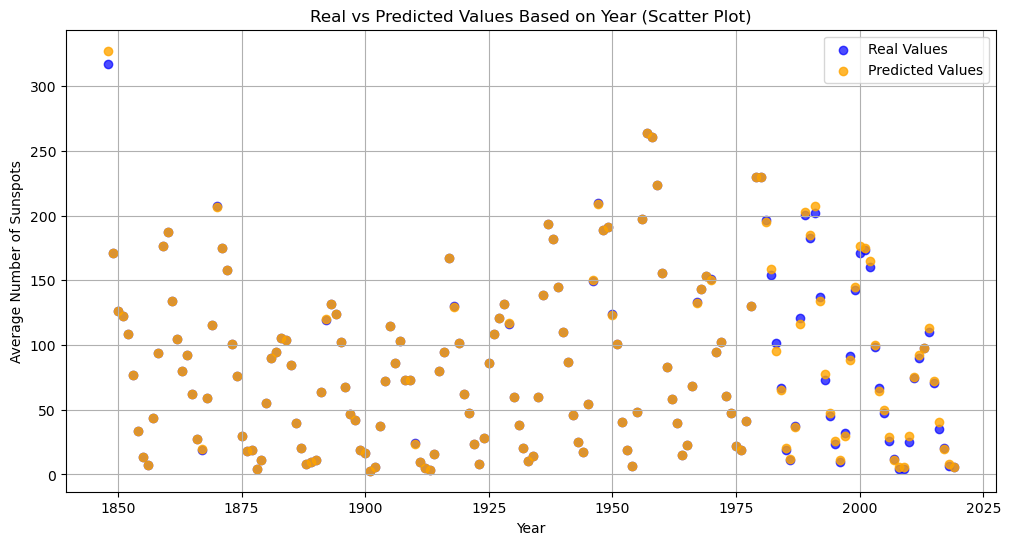

In [24]:
# Scatter plot for real vs predicted values based on year
plt.figure(figsize=(12, 6))
plt.scatter(y_test_grouped.index, y_test_grouped.values, label='Real Values', color='blue', alpha=0.7)
plt.scatter(y_pred_grouped.index, y_pred_grouped.values, label='Predicted Values', color='orange', alpha=0.8)
plt.title('Real vs Predicted Values Based on Year (Scatter Plot)')
plt.xlabel('Year')
plt.ylabel('Average Number of Sunspots')
plt.legend()
plt.grid()
plt.show()




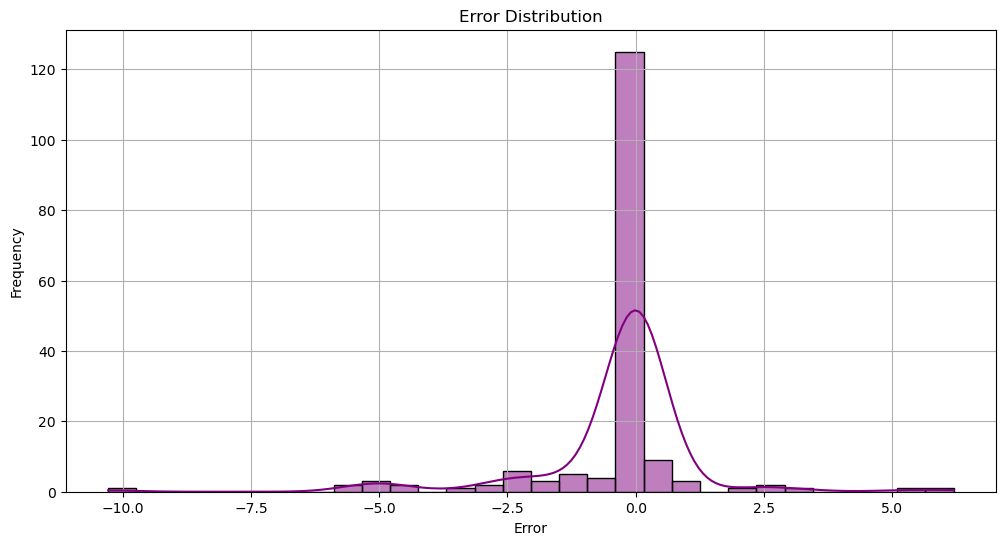

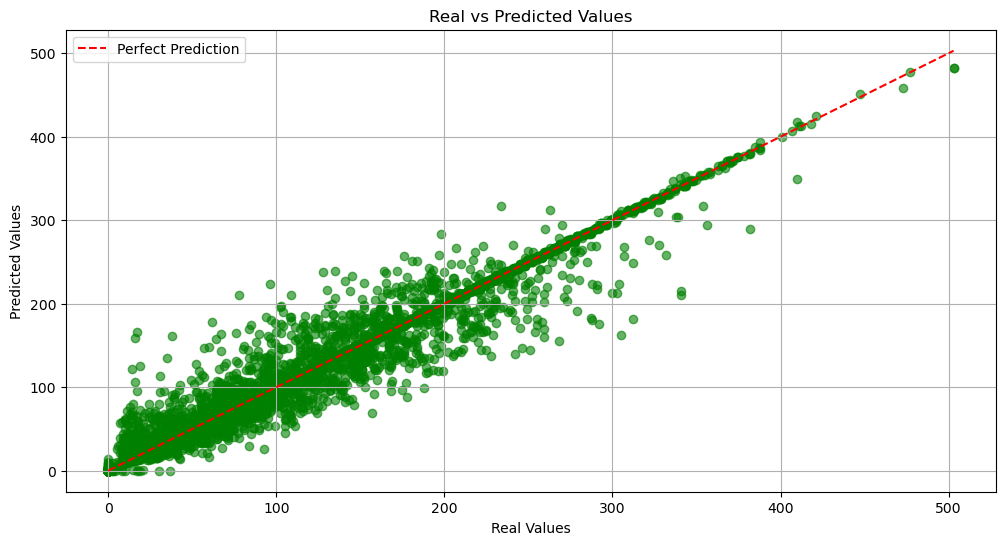

In [ ]:
# Error Distribution Plot
plt.figure(figsize=(12, 6))
sns.histplot(error, kde=True, color='purple', bins=30)
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Real vs Predicted Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Real vs Predicted Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()